In [12]:
import numpy as np
import sys
import os
sys.path.insert(0, '/home/fbuonerba/codes/')
from mp_functions import upload_log_return, upload_factor_loadings, request_rates
from mp_functions import upload_coin_number, upload_ohlcv
from coinapi_v1 import CoinAPIv1
import datetime
from datetime import datetime, timedelta
import time
import calendar
import json
import urllib.request
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import cvxopt
from cvxopt import matrix, solvers
from cvxopt.blas import dot
from cvxopt.solvers import qp
import csv
solvers.options['show_progress'] = False

In [2]:
#load coin names - it removes those with some outliers in historical data
with open('/home/fbuonerba/codes/meta_data/new_coins.txt') as ff:
    coins=json.load(ff)
bad=['NPXS','MKR','VET','RHOC', 'ONT', 'ZIL', 'NANO', 'BAT','BCD','XTZ']
coins=np.array(coins)
where=[i for i in range(len(coins)) if coins[i] in bad]
coins=np.delete(coins, where)

prettybad=['BTC','BCN','DCR','BTG','BTM','XVG']
prettywhere=[i for i in range(len(coins)) if coins[i] in prettybad]
coins=np.delete(coins, prettywhere)
quotes=['BTC']

In [3]:
with open('/home/fbuonerba/codes/meta_data/new_symbols.txt') as ff:
    symbols=json.load(ff)

In [4]:
time0=1514937600 #Jan 3rd.
time1=time.time()
time1= time0-86400+ + 86400*int((time1-time0)/86400)

In [ ]:
for coin in coins:
    print(coin)
    coineth=[]
    for t in range(100, 320):
        c=upload_coin_number(time0+t*86400,coin)
        coineth.append(c)
    print(coineth[-1])
    plt.plot(coineth)
    plt.show()
    
#BNB is the only one that loses money sometimes... which really happened.

ETH
1440976.5055483554
672951.6735468421
765148.3892809588
746080.3323840358
673568.9716365817
616660.5837717797
839410.209242227
1142518.6732055785
839691.3350079589
774495.8810926641
699109.6362698918
1224704.9039075198
1923716.5610931157
991715.9058028916
817530.4772251677
640588.2088007419
606818.582096252
704389.1126320991
869291.2873645418
681821.8140320538
1350793.3500121387
991141.1262262152
746257.8102964541
830767.2370611238
1674589.8848520147
884003.5309053821
836450.9360369409
656220.8303425976
1132507.0577276694
832613.9796513374
716683.231840093
987882.2122799841
723404.9108415637
660896.8399472488
637614.3200026758
619282.447760284
463653.864547541
460157.220921196
460672.8208996681
754581.3557657942
1353390.3409310607
1111214.9372363947
779358.7551362043
476960.4112661562
665414.2171004203
1184276.1447758484
975441.4367514678
754751.514247336
707615.5514736178
648911.6522166329
555459.9734428709
1566829.4660992096
672050.7829749408
621048.0429954577
568778.4628452879
59

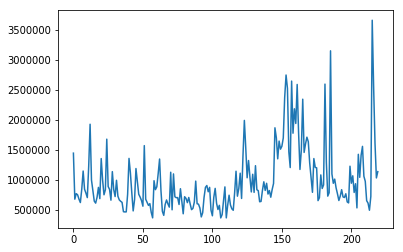

XRP
490608474.67401075
227925663.82234862
204180488.24414548
176697650.75368312
181240171.0821464
239568822.375734
276338155.07613444
651646833.9330711
402898462.3457864
232551076.0334425
236366469.1599469
408966023.9665218
502006868.9963723
288326274.74066013
215848271.40058544
210867324.42550403
223734971.29318017
177962989.91230884
179747923.53973097
164949141.0138879
217872517.03118274
300779097.82254916
182978565.5445848
154176262.33140227
189965303.32625952
153090456.35209975
226159514.2896178
140183975.86624473
367927047.4721616
192254021.940218
151242520.94499767
210567410.4921779
173982925.65068775
165953245.44933006
149869582.91251293
145368822.71274993
101405266.92519855
119087109.13552913
119260319.14989318
119088661.3739921
255119056.0936102
207795049.66274893
155546241.28570598
113693318.97728397
95597625.57199913
187314210.65257683
185854714.26350743
168396796.94100106
139323263.69512317
114486733.73688893
138947650.40576786
170815891.8398569
262239255.77403703
141907473

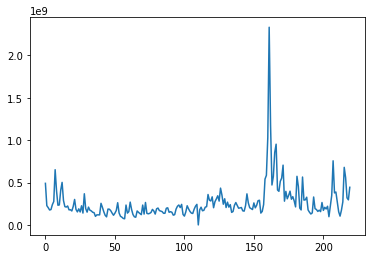

BCH
187961.20570741795
106219.67754227697
145247.731343936
162414.1075907199
142579.54683298
254942.42829930497
231586.75974271094
340985.06710181595
315999.5640711361
258931.273292645
449765.23558969697
450880.99222761206
470466.81438401126
255255.01649609805
182111.4391937679
139843.99658362594
186179.59783094493
153795.54757542798
170674.40448654493
233034.06961221795
250944.23914979398
186191.26312693994
280979.88470579096
286786.7387824681
228548.60570577797
183179.79253832513
217209.13067658196
186508.118917879
313774.19070934306
249858.72224342596
164241.19682989386
228670.72780176494
211729.40259135497
223409.18607003495
199726.29381097198
207104.72909677398
131631.08221512503
188708.458680395
147622.225462519
164402.709113754
274834.40375918796
232150.83068275792
180845.84513052506
131088.01638625906
136777.78711468
185032.28509297493
203191.62688676495
206268.72740898593
239237.182342483
127553.63559389507
165744.13681095096
572249.9161333756
220198.24748451702
165680.6704952

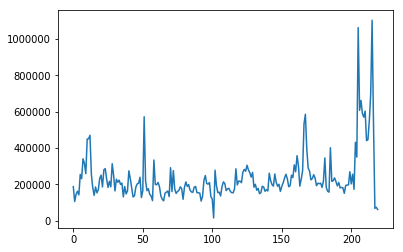

EOS
25804361.988570876
19048951.4785911
19770236.15726713
13463846.464288099
19555430.880002175
13117937.052849967
13850551.758907892
34231326.68457819
19503842.005315717
17279231.091440614
13586466.335865365
50974181.016610086
45484980.79414222
20793470.815441843
28391154.587452758
30377707.35287782
44730472.35642505
45866182.22612306
32616099.34414694
21589203.315974567
26855776.119548455
18684350.89014149
16546933.399506923
15377111.974351324
24570480.295277666
16709908.034192257
13363750.90492889
15981431.629041307
45814099.077525064
42370433.847610794
18569804.15767497
21841728.386390436
21362662.305406634
23569584.191728137
27687348.255483173
23039515.71080706
16040347.020332236
20002086.459584426
14814808.076505132
18633849.914800055
34649239.044079594
34224281.77502626
26307067.398368597
16438314.761866823
19871908.53879683
28936389.052405696
33551399.710487705
23093898.668699685
20502051.251447115
20499844.395566903
47390948.53488696
58353303.93425286
25201681.061707888
231847

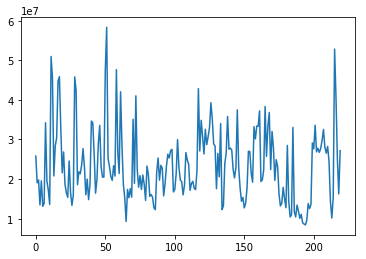

XLM
171022688.9743154
78615338.04664032
159675046.76398554
122220389.52671534
162015479.5471875
178352507.81898096
179878965.9033455
161834667.39263457
103575861.04137622
67051346.044782296
71050427.80746876
115942959.4719379
146042384.60959795
138554741.1795425
151653838.52125806
106531495.59899625
129056971.54102466
80330661.58482498
134336544.68658742
70571351.56980051
84715319.33615209
42692531.083462305
36526122.299634814
34448798.894765146
47242394.87478427
46901640.73999856
46362342.739149116
37797631.381413065
80665990.87917683
85982909.62381443
64263095.17566668
53826420.39683598
43374705.109161235
57077428.17563371
31951687.398629263
27736363.66788178
22868828.817366343
30215837.838921554
25287074.296991445
33754468.392928734
45512843.326832615
60327749.33882475
98260135.99979539
84389063.3263583
102401727.83377598
96763482.8664431
107917418.87806691
118864974.20210217
118907741.92946145
104052001.21012054
91918665.53222632
148879119.88697857
171025502.55018923
81109325.52696

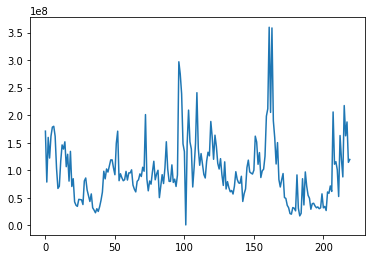

LTC
1487971.4515236209
679016.979907608
743479.4611642598
810574.8947109691
1398243.1495670043
892907.6331214389
1015643.190319197
1128524.075693192
1115954.2470107323
693009.7617793892
766194.9907538171
1455238.8655860801
1664897.6904813314
863696.7263112549
819530.7956971601
640031.3081167
687886.288216449
628571.0539033499
749048.8693196791
756332.945125829
1437763.5133563636
1380671.3878744827
1647638.227198216
1312688.8143887264
1298427.1054213075
1149200.7086775054
1075034.537243957
854513.6288464994
1456440.5681115158
977136.5598517279
841205.4401753031
1582133.5237468195
1116999.003608335
872104.588889497
821598.2570241975
857006.0249945293
631152.4677970643
726987.092004507
737640.9618211729
739814.0548784671
1160945.7805245353
970169.6877526462
793200.3432868198
627268.3732842382
598765.8601939487
787539.4781387264
734962.2162094911
627813.042421517
563902.2072840281
549877.9524522801
620026.9649458592
1824947.9032940161
664250.5825980768
574304.2479263658
781288.4503481084
8

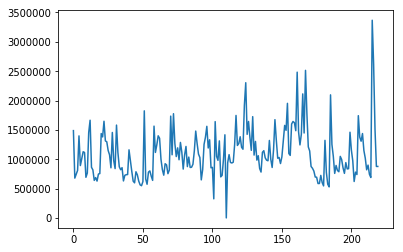

ADA
301259481.180564
124099872.04505119
164822985.6180701
619148151.8002014
498859762.9698629
180352181.51543346
216509259.09554797
259553512.07995352
195772790.0516047
110614488.72336109
104996754.18014696
253444496.5295818
239183857.07976615
165116159.14757144
166334343.21109298
496241667.71545756
408509852.4542405
221530223.58814517
245093749.42910352
204717848.49506107
213845552.29215196
128050571.17980686
95983298.23430033
92559902.1414514
123084883.79768698
124423942.62850924
123128153.564693
107554675.9336075
213622340.8024054
156393911.25279573
132246722.60194154
111080437.26511353
110648286.47502796
115082126.44588017
103113863.41718979
105916012.28020415
95503132.6810098
159482419.78566688
115269922.64296192
108944789.64666216
162477873.4787036
144214650.9851254
130553822.05326658
114766908.7482041
117406643.76102652
181642527.4988867
275700757.62313247
287124941.97684103
246106580.3021201
159458101.452214
157679197.6591856
178299475.0274259
153395177.87119085
149423231.03378

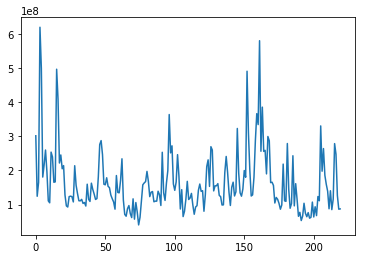

XMR
223412.51063511297
169565.911275232
183358.05509932802
134328.44505717704
129508.33494176
391317.415547118
199788.50794017198
264010.18487096904
180221.99078667097
237501.93178930096
203560.096057758
234284.98387694298
324782.512253611
286101.699565842
214598.72920999594
212871.81932284395
213272.13045670892
286038.257056519
214085.599485307
230878.41282403396
334445.520962152
239758.49694839193
221319.57920975803
148219.56247089495
128128.46938027501
101079.51584670498
119401.970417898
110016.068044955
159742.51077295298
115489.01101492197
103624.62560409198
177678.60935918306
216498.84364087897
186119.90223150197
182389.41489569005
244661.80878103402
132119.10839512205
137395.06331206506
146756.263487368
238252.02683929398
223352.54686339298
205920.42324847102
127036.52819314701
73059.89329332701
157203.92026306398
198935.93327216202
265192.94854432094
179399.160143657
181696.02517464195
150507.39978974898
207427.07191514203
344910.12802823697
303109.13137981395
187415.277772245


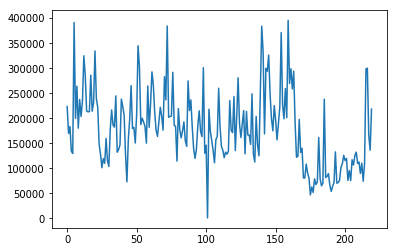

IOTA
52980376.384069875
25255233.544036303
62458647.93937686
37788138.550244
26974082.371000934
26767236.630207293
27152923.286004458
40219431.151334964
28913249.17582432
34028727.269075565
31881627.27518812
31388144.438664712
56697810.63998163
28684972.977021873
25390521.21684341
24166498.643030383
27802794.814792782
21121531.48680515
24116266.73365517
53738028.76968991
92106523.78829265
38383514.68202936
25199858.212530375
31085498.336408295
29643029.71593352
61923977.74590306
21145030.173036415
16994602.99396748
41519099.50227093
31847907.421416506
18521506.413490854
20617629.417085487
27461522.644579753
22688812.829108324
24001121.30667263
16623512.159503143
12550443.334272146
10242648.979237547
12695874.45960917
14988816.862046724
34353453.220437124
23939545.20072017
22588802.92858681
17477614.367629938
19605976.970325205
21126222.85341614
43326991.70290316
28685673.369229857
42476209.26804155
40031854.36174749
28608888.202621616
46814148.02023656
29203684.728396654
21197932.56163

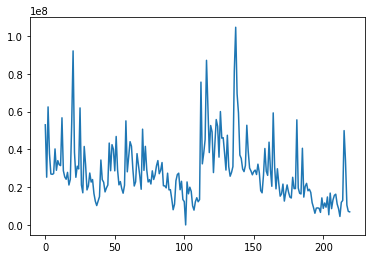

TRX
3995690434.3912463
2971734517.394386
2870661319.189143
2717723855.9316216
3477758523.5872884
3268204045.7861876
3855848700.203983
2634353034.2880173
3433999861.8789835
1700791356.3605914
2765635833.2347746
6767898019.811867
7265708361.575761
2409765432.659187
2876161115.88846
2161314365.4503975
2639425965.660915
5275776846.423154
2930428825.810354
1184460906.222886
3038883624.6661286
2819391478.9762278
1790232245.0106766
1305431814.25383
1466722366.3665013
1609572779.0856295
1404221019.911291
1391163353.7668576
2275056489.2782583
1771772458.6604872
1785105214.4649606
1523404182.7667148
1364182311.6438699
1819798072.2591739
1311015179.0390975
1086286859.129408
985546224.1067271
2105534922.1706698
2890296076.088142
1864422453.2037535
2355820137.453923
1820283362.8196867
1116074661.4748247
1656840091.6031866
1578200192.1497428
2310450005.0450783
2207511531.327704
1988194151.1373255
1915295387.8763251
1334989150.1982875
1341035112.2724319
969570584.706181
880239023.8252468
790599052.82

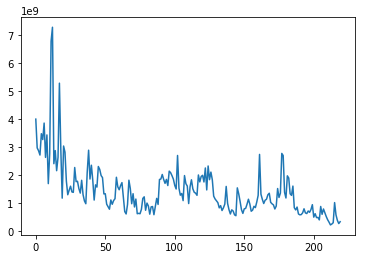

ETC
2878682.88833751
1808920.8176575003
1678307.67954846
1827570.8148449
1874772.915112
2643548.6849262
2541514.2430793997
3422725.133641509
3083473.4392087003
1909774.18762994
3749744.1297866795
3807257.07555276
5937422.807936232
3730235.6745451386
3560079.170917
2530019.32279477
2642297.3708054298
3618604.5467870403
2460344.428905929
2230580.151486869
5070944.67992681
4098334.16287485
3498432.01697596
6950463.80926225
5428629.49340047
3341138.9350748095
4273668.59552002
4053623.87170284
5809136.963970211
3599334.8939838195
2827830.1432997696
3246848.40237626
4154279.3998910547
3502895.6577341873
2874800.073797446
2613954.894154083
2138761.6670613694
2276231.1775150597
2121441.142281098
2614451.298475047
3402829.843358951
3076327.33015443
2584322.3145031
2076071.3593438796
2181629.89195176
1998749.2214686638
1466675.3033991887
1072260.0959548801
966097.33798776
1124192.783299659
1311703.9452311774
6043098.331348079
1474118.078192596
1072466.1766158198
2370295.9839656902
2148613.479937

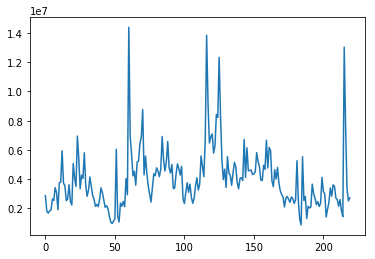

DASH
144443.26104059297
110646.65242828998
114473.991757847
110251.596663762
94162.041716778
129860.17402263198
112913.96896837097
123003.36793134402
89056.83805403001
96704.00482335505
146276.19602265098
116645.49305244502
127762.49490852603
111682.16865757502
92462.75559623599
72041.75994789
76966.20250026001
85887.54819055
90468.72509861997
86954.21650650998
84845.23641943999
94128.71291256999
87393.97299077598
77533.00800947598
104701.187894677
92344.04988919698
95460.004984334
95497.60661313601
111567.76662344701
79036.984350767
76436.69938944699
117361.45961744002
105631.06023931596
91895.30708044299
100015.041131382
103980.11815446199
101204.37176355801
91224.25983229799
103557.81637364997
105455.842131466
114383.03013195303
117888.02917983699
96137.91244758399
98089.78462846599
92841.41886726495
123654.06014765894
121300.589116137
108446.298375986
99115.458597936
95646.55823074598
233125.74644724096
332128.7754227791
122670.57124276199
113793.14103375498
99478.73422368299
10722

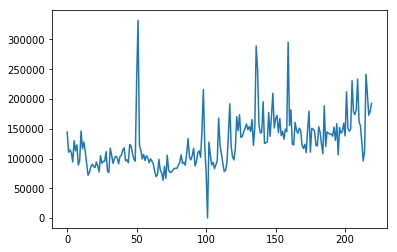

NEO
1122472.4261232587
561591.3927868399
757660.8883121161
746650.870725255
745467.629136483
915801.859375081
1049827.209333931
932094.7097144302
842088.6430054271
641454.255978624
652017.1863381899
1072226.4315708643
1250102.3079455746
743520.0504581709
610849.7806233879
661825.360464711
2029138.4269021512
1641059.591841141
817459.556977801
636064.9905799611
1053873.550130851
679287.330249361
569995.4459508869
793827.2304652767
739196.6637148617
580573.4415982522
562455.2863348
699844.69498702
1069537.3258826726
695954.8400121981
593151.4449183048
727855.4317704109
593927.886731559
663496.3862480241
621843.974240218
570235.7596606707
492048.836473665
541915.233103893
711132.5983505968
578418.6526756111
745491.032589807
616448.207425827
509087.19739879004
448789.82532028196
357463.37363831105
422032.059794253
417089.94899417495
254254.069450276
283885.74709712795
398809.864354268
347300.033082117
339521.9854218351
339636.127241361
326798.2511773459
364324.9397017349
314807.8928915091
3

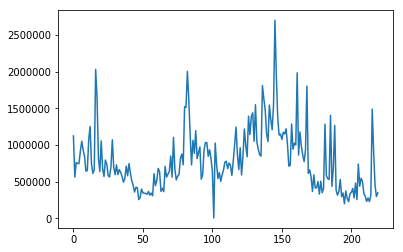

XEM
58520810.20600305
27384528.4264921
69024649.02539194
68643539.53177953
34426010.75433267
50774276.23052688
37961181.79456235
34778016.09516181
36348280.3794461
22851059.385466542
27173037.09967218
38322303.316757835
60776849.507643856
24423168.083785232
26105188.29075051
27808175.652326345
26651073.413560882
19361900.830181304
19005880.982256006
28097337.216149148
31693098.807345983
17718205.72073644
16925941.763701595
16357949.710830674
19677211.073219664
17160737.840075396
18276925.903598342
17324105.032344345
29740030.028727647
17706477.216322392
14953178.73749096
58239877.998665646
25041232.25612414
20279128.402765762
15928748.403508129
15374493.654746115
11903494.586574076
15121013.71515998
15559586.764332544
14839083.838541308
25826349.68632968
15361471.75513502
12742168.505950835
12602528.697135732
13559397.405242784
19836999.965265807
32186844.346058555
27859103.145169828
16207089.3822528
23446489.98885294
17296089.62096361
24556377.20002902
18548985.71782075
15901817.03559

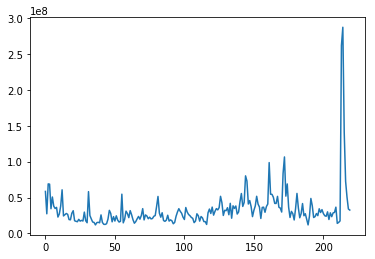

BNB
3717175.6678932295
2294842.1378932297
3018988.81789323
1993001.38789323
2116793.56789323
2459459.1078932295
2221688.96789323
2053136.64789323
3598259.6078932295
2149055.19789323
3252265.1078932295
4225292.257893231
2705234.3778932295
2917730.0178932296
2553191.45321859
2635961.4526499
1930803.56533249
1692436.3986698
1746447.7134586798
1688134.5882499903
2120126.8667603997
1559163.4961346001
1476662.5017951003
1611355.50737233
1272960.4078160701
1161514.2648228002
2471997.1782945297
1807791.4530507
1371444.94734239
1084230.5603198602
2590871.1261919695
1277280.5957063802
1375725.52190943
1069941.19121049
1729678.28916595
7305616.83477224
4794345.44851935
3422706.6636905493
3455042.5953288698
2969664.72597639
2210237.5545537393
1969460.9413479
1890420.7313479001
1813049.6923436201
1502257.9411289901
1208207.6007980802
1642318.23549675
1493827.55013077
3038993.44251675
2643779.01434294
2774356.9766767197
2501033.3366767196
1906195.87667672
3186712.4766767197
4173859.0225179
3317830.9

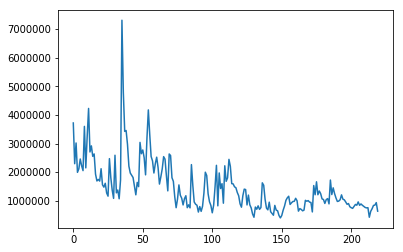

ZEC
147087.45709324192
97249.69657806202
85735.888768126
106089.16795849403
91150.641011384
129411.02265584402
117037.55687151801
131013.36940924496
97174.65455078303
81191.13924445499
112890.54390623402
131566.442364372
127813.659417246
86818.51323146901
70468.61758725902
63969.57029732999
70661.10183815
81337.96900646003
87025.8154263
67535.53881132002
106102.23318011002
74625.84164555003
71249.04059733903
76280.512268679
85695.30614726798
76671.87256457002
67603.10503688603
79301.75441308801
99255.15648377402
63607.719221374995
45082.116661741005
534864.1756911981
645958.4626682409
435441.142506974
191650.830633248
305947.137309859
190129.173943039
160067.536259051
114740.63562011502
228086.943967484
247096.59547283198
171528.756478803
99936.49742648401
75331.09924132102
75908.65241765603
156872.58952022
127051.25394535906
88709.07028509102
86020.154710103
100589.43643661503
120163.582044812
142429.74458255598
161315.343796012
78195.03533202801
76887.356500426
64513.192386172006
579

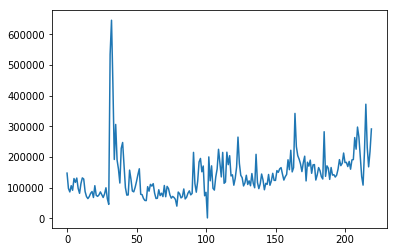

OMG
9235923.345404556
2633150.280780089
1599072.696188209
4770795.213260243
3122251.7530273106
1813763.6064135605
2321557.0287031624
2142668.2947507296
2319225.559152178
1154899.707113374
1460369.0141760895
3999893.4599656365
3871799.6362984567
10411794.95859506
2391087.9188817707
1339184.1043788625
1631683.9576198827
1482790.0540458823
1169642.3234089024
1135921.6334559224
2643330.897303423
1602090.385587592
1185953.502878036
1073819.516478826
1462178.4473114903
1200000.664264179
1159082.9375268063
1144031.632393876
1824985.5703618668
1231933.1603642798
1182173.9153772423
1405171.0345114681
1041779.5346086122
1006869.5653342343
1701646.0402675273
1251306.458369822
713042.690452938
883102.510768015
1005216.4779895559
941779.107762011
1942324.933846325
1963863.475057567
1093264.549669089
1048052.8188609579
1221841.645506416
1494270.0486876303
1515883.7703524714
1363994.1455129914
991739.1994677639
1304888.9103065724
1820366.0342086563
1694393.9995743465
1534440.4782974375
963339.0421576

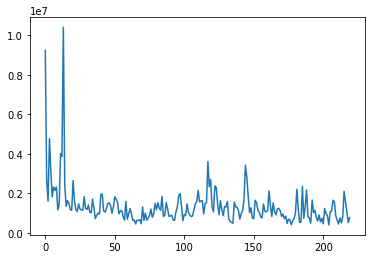

LSK
1665021.2617243163
881866.7968651691
912027.8551779741
1628168.707633151
1143676.6058459322
1243816.3869748223
1119321.6835272124
1335541.8919837512
850422.4364325228
749346.8243961768
986907.6009361569
1227203.316250916
1326280.0558579476
1014910.6314298349
771747.1097017269
579874.9626477499
1469801.7334723102
1696232.5001479902
1651731.0412377298
1766273.85452283
1640303.8147347902
969739.2649795101
711482.4653181771
594397.935110347
559395.048678868
605195.201393053
699191.554326192
982187.326115308
993356.0664744189
624851.1043366719
615719.117308203
818704.108855914
601445.726805586
531436.06972937
1316954.7313338139
534435.1847173538
408460.43459228886
477659.13987242593
782639.0584612938
694322.0660999197
725254.193849105
686975.8822393029
638114.5558202079
526835.0081967751
469394.10508560995
685972.5350397141
698907.503620908
368946.53638408
515922.558780898
448074.73000944604
903784.6513283851
1197045.9881833014
1254421.9252901652
782991.9607650049
838996.3695570879
6101

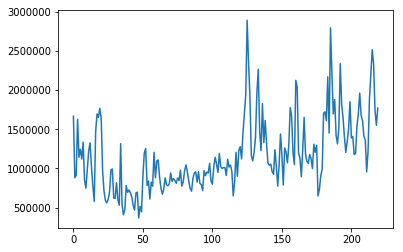

ZRX
9822741.813099049
7650080.223185976
7256251.327861843
8253040.700690593
15567152.773439297
14694333.4465492
7827996.827515923
7634929.323352777
8589957.60686254
7152241.424691761
7489093.270419756
11397564.325612243
13665282.24906579
13314906.085602134
5558334.505178278
5701595.861914017
6860259.83090182
7016643.09147786
3535157.425190777
7709713.796338797
17629101.500519082
26794654.642017804
15603529.991082294
10471705.223733397
21928928.961375806
23641730.221751675
15408344.56786642
28042378.965338916
28656672.63208812
11833222.334159248
10263058.414249705
16262440.653925542
10803025.50402242
10455281.360433483
8567351.71338915
6040905.252389674
9630893.640210725
7130623.921145126
4739437.268063761
6855600.555319006
59823446.31309977
37396053.36613798
12765642.196382295
7838705.385733866
6792339.4157697335
9956633.320709685
17253756.570055094
28047193.59032837
11918284.678420926
7040853.231398809
8794200.117397582
9350598.726966556
8272226.102889829
7181397.866640095
8966432.842

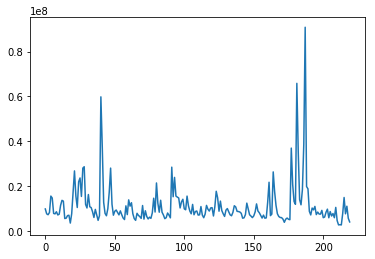

QTUM
1651265.521260617
1042678.1391285411
912126.839655741
1062762.5701734312
986725.946742834
1029995.8030957681
1457529.6427125933
1449713.658788839
1110251.657252081
798460.4876362102
1064202.218305301
1490580.6225445624
1208876.088124711
915721.4838386731
749563.7775413401
834781.03998951
1288759.9489847799
1367885.5677556496
852909.9307932601
662542.6642384599
1040233.5998443901
887879.68739599
837439.7750546021
1220941.6292335622
841742.8213512657
758056.9376435609
854607.0458418269
857050.6823916549
1179451.652200872
830560.0434714078
917871.5624819819
1196446.8767788538
927944.535649197
713467.463452679
741423.48916436
735973.6680266991
670303.4382525821
752147.1850464799
712710.149618906
717804.2227884689
895603.575428644
986678.632460312
782902.5517843039
623084.8391783779
644167.7055781521
689026.3123301619
490011.511495662
292699.48323834804
287690.716187177
519647.7202962639
490307.84170808404
335431.44836788
449168.16215043294
342451.82326932205
692631.527142364
579357.17

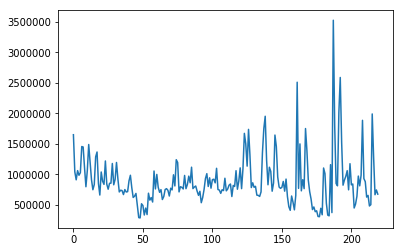

DOGE
2309983798.270147
1810100352.6732147
1071274726.2892467
2405021667.6731715
1864504166.0685413
1485262713.1804097
2072405051.3995724
1304673283.0258033
1716773211.606537
1041282434.5524999
915467816.3658597
1235533041.7104006
1710358180.572963
1101611665.0587492
1486331271.4928873
1031081370.7920076
948288795.2869909
811918054.9550819
750044537.5397673
1149680711.6570508
1950987350.7339456
1301383632.776587
1563795141.8430645
996675663.370736
1254682441.1697311
3278970699.708011
1818976673.8485756
1208564892.15792
1454390628.39597
725024987.9356108
666192124.3197957
836083967.2583476
1386478322.4114282
685702990.7979625
774202611.0904214
520014057.11544704
440754579.9792639
526338531.67349946
527078699.43817425
1211464856.8042026
1499079680.035815
1023895920.872919
682988572.9691479
424808970.4414321
395925774.24675
663040030.4391088
851521227.5211748
746178198.924203
1191051216.6270525
691905468.3858143
1517231536.5289998
1833545157.313371
982994339.1788485
1070035114.7409589
9842

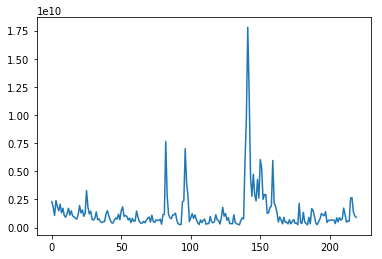

BTS
42369456.492534705
18286139.281560495
77600034.91261218
20924324.811112132
16614225.340176499
21254276.19356907
15020220.805734688
27584196.189114302
28172467.66166113
11782447.48768044
11406089.384506281
18800448.171741877
32417737.24799072
14827098.23782942
13894270.009033058
14225209.668590719
69513097.98352875
104213276.36318983
44737822.03749578
17735672.89991708
23829692.816995278
16089919.977280382
14819342.90664536
21718783.494125485
16740636.829599505
16734346.895792194
10385527.485465098
28986181.950316586
44241686.88515926
40164622.88283007
32944738.17691808
17308029.732826874
17458767.791959923
10938244.371013818
22186679.730584856
10319177.148429234
14696220.231886666
8395636.477725655
12825942.960485626
12716036.788878847
33106844.417634632
22296355.068794366
11523975.673207855
10926683.963511243
13132470.900085717
15503944.719392318
15643000.502822042
16186502.692902323
18511317.74548821
20222684.314323287
19368253.630435403
31724442.004197106
15826919.46852376
16011

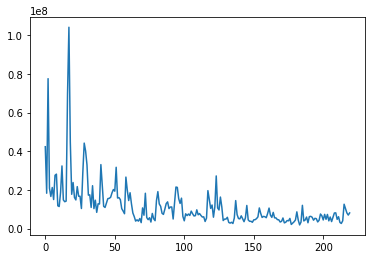

DGB
246473309.62419486
203093860.46354416
178441376.90736005
127395655.9048646
164045312.89973012
159542950.80493543
178326365.94626167
129951080.76218316
137105281.53657722
82585778.8479647
77242090.84313697
156834043.43676198
165179518.04596502
248597377.87780356
278077326.4383513
160474950.07707894
116700586.91133164
103480684.56344303
137356252.08539337
176155528.0065325
179940962.7046157
140271008.76654944
104835065.2054319
107010853.46685494
85489491.26584618
119361109.67740135
151366702.15575865
120787616.04098323
195578290.8463079
155972833.950992
113805217.6923901
102958633.17205966
69542318.95606127
83876970.31030566
93370673.91158953
75977765.62450543
84260019.94441767
92276604.00502653
112096595.45039527
110636505.23022577
126154981.09477781
73324432.18748006
45294532.30120572
43518287.34139828
38969660.44860965
68373724.6794037
69130907.26244047
43348756.11363394
54526156.11417497
78093196.13359883
60808950.363338865
64213993.80276324
73277818.04020935
54519962.673717916
6

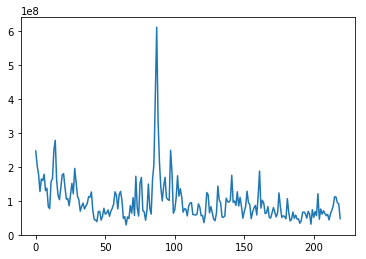

ICX
12193330.80357085
4661949.024307293
7036976.577047368
12337624.771923965
7317724.958118462
11085407.501325771
9941268.778032733
11071721.493494175
8600258.123496918
5619621.141912009
11963862.392722452
17948192.400159348
16300159.782553127
11442371.973779889
22422590.63557133
13028700.3385
11961897.063500002
13253565.9152
9192600.1518
5393084.6641999995
10739395.1338
9018671.2726
5068761.831423096
4487980.5079230955
5723784.153446995
7484718.738430795
4925130.406046398
4922099.523166211
18411955.168626882
9785619.330136478
4550145.440610804
5669841.065757442
10396352.814552521
5428829.130546593
4881048.321257301
3545468.009644645
2340330.828509596
2657689.249382799
2895600.837944305
4927197.317832785
8125300.354689593
5832754.342644404
3739451.9294699817
2360767.055410125
9062277.897982525
12875821.365337165
16127872.632330643
14104005.430224963
12995153.946130598
12071559.17037182
5291863.141021213
4288691.892792795
4479666.539990615
3849203.824154535
3864191.450677216
4005466.931

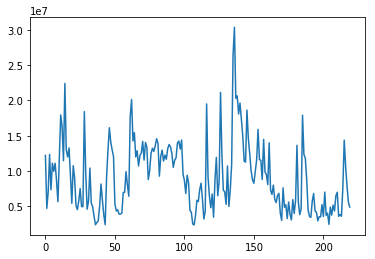

STEEM
12247017.037043452
1440892.817383073
1116277.5439736932
918290.857459913
1956927.9607039732
2363729.423443153
2498088.1932833428
3048577.398128493
1279540.769153023
939805.177353583
2304925.726054983
2483409.328466973
13316318.188462524
7105546.737224763
4774955.197898393
3624394.159166743
2167706.3354602633
1400774.882664003
1277577.9626406531
1104893.939469173
1485077.3478038833
914950.622049993
2328110.747097609
658868.9819783691
921556.298506206
2438508.823701667
1267552.0523550939
1123622.673960897
2094932.235232981
1143521.695127252
1458958.351653523
1726150.1952912346
1293522.8141314338
943744.35113906
1025043.1209941522
2254804.589477533
1740729.5628815317
854157.773502042
864922.482433966
1822654.1510795779
3032075.0088841096
6850984.970938961
1324586.3999318879
792745.429397006
1194850.0892375149
1417782.80285905
1692520.3523483172
964247.180119733
909478.1558689771
749507.240135294
1049342.361421896
1313129.238493302
1040650.5793574749
644147.385422818
840981.291441516

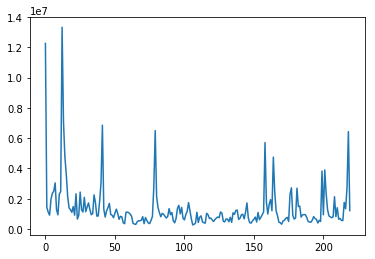

AE
1256540.4010416102
717339.7698200198
476798.34156240994
767252.2848516898
675247.478363
1056662.34539865
1317613.00865177
1491097.8952604998
1114492.23765331
2841066.51808327
1154539.12027802
1651237.1753465
1111442.9624972602
2064173.0410027301
5354357.730693031
10636809.704220781
13484544.437651258
5572944.07122892
2630615.78987181
2885953.1110217795
2273406.6735894703
1932968.42719947
2186923.2686076807
1404622.4802209002
2138133.6908328603
2737087.39500551
1649826.0764117502
2345157.5721532605
1477750.27132928
1611033.2441323202
1426213.71454657
1332628.3770287922
3540125.7936856514
2461016.14405877
809393.6041956679
770754.0225600669
407997.06329320295
626637.971454634
485412.995622125
492596.976455788
1846612.8102971562
1097953.033488655
550148.7372229001
390560.89017212694
407556.16881343495
550188.3571676359
718698.2577216721
596529.931403984
673384.353076694
419447.2766324639
1296312.6836481588
691953.000796822
592767.618220934
616422.6093270842
1440833.280525788
2962389.52

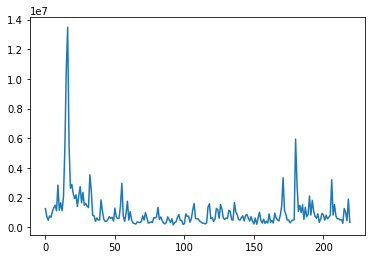

WAVES
4876143.30812242
4632436.96126292
4055097.6989007387
4456370.86605847
4527261.074344839
4633690.756788218
4350616.166164428
5069244.672847698
4495025.61463929
3122052.189148799
3523654.0141397095
4899770.430968178
4650642.267220048
4558685.49692967
4157727.0181770995
7497499.699626318
9447671.529177481
5534734.89480891
4170948.5374326194
4719315.089480419
4634332.186952309
4223091.799165789
3773122.52316364
3406796.7034509606
3725595.3851013496
3516422.5255713994
3844170.68296736
3742404.6628229
3657894.73158003
3250388.1459057103
3067282.7987444
1998266.2671767017
3811615.458930989
3722938.734756041
3593319.396825389
2280109.7069224636
1557439.393832553
1588736.3408273181
3574511.374075059
4009280.694426266
3311389.7777691637
3248702.4954442903
2736421.509612229
3092617.5771018392
3042434.417814034
3228439.086320756
3175963.2281478588
4914834.612568012
5502948.520098876
4268454.88465779
4019736.3641207996
4228650.52144127
4502080.418779548
3980682.814483469
3864356.6011044295
46

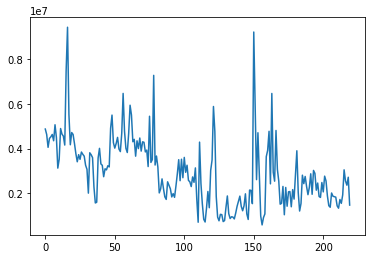

SC
1981995441.339473
2674612280.4339366
2019955712.8991015
1983981582.5270464
2200288188.641134
1856677736.735117
1999402949.401012
1982255902.0859559
2076157669.0355713
1649507065.4730768
1904875056.1597757
2243033912.301821
2081635080.3024912
3015151663.377032
2600373468.4102197
1628087479.3515046
1684656683.4240875
1637847721.439766
1603383761.1524274
1631705314.6889567
1720978659.6451347
1560165888.714516
1487917693.5926695
1524911702.7336955
1492331488.8039827
1614205129.8474963
1568220568.452795
1532338551.1211822
1857446985.626455
1585994784.2466834
1555722140.7291427
1559633434.9308014
1484365031.0815194
1525757222.6201093
1495770250.625931
1458698248.383125
1443805939.1856318
1462937108.155281
1489262376.4208314
1465537864.3718328
1620290080.54696
1539959557.3655787
1490204407.0386915
1426106196.083292
1422700264.3995767
1565649118.2706969
1495406306.0093675
1607802001.8424196
1521647005.8573637
1477927917.8548589
1460452358.7891698
1485625187.4291768
1487119717.9659424
149175

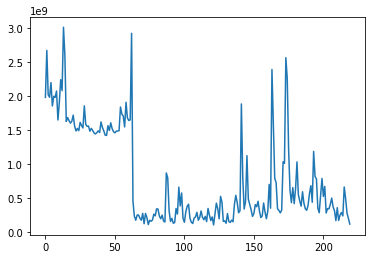

REP
499366.45512582007
436237.04543735005
460555.6603462301
445533.32413173007
455756.32543960004
489393.8497588601
645582.0452001999
468233.42372707004
441231.93655310007
430001.48509766004
452192.67787807004
451510.43855442
482285.3004548
435376.37716755003
435883.99946404004
432932.7856784001
430866.15141125006
453592.46606406005
434525.32409914007
475788.82746750006
532639.0486531999
475934.56062430004
430597.04550518
429119.82127031
429775.54482437007
476362.36127964006
652905.5720570099
507731.5346068101
1008392.70305273
264910.55390327005
116266.29753819
185945.92612107997
198466.05125784
84002.59086391001
315324.41978235997
173735.19366543
45986.81241875999
36551.56100051
38367.613806060006
56735.58282694001
70026.4145461
48604.92703873
40114.03249899
23708.65011832001
20632.952805670004
63168.04437167
86680.90533953
228498.02098474003
71708.40491363002
66481.63475383002
87264.59283617002
451718.3703484201
162823.69617408002
35197.10005272001
39947.96054319
78471.00631471002
20

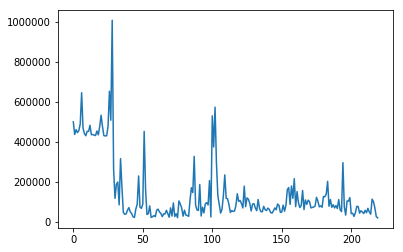

PPT
183862.10717225005
59987.09192336001
58693.28026523
810928.3262351201
1066358.56362179
175198.57378329
123987.60549542001
231302.8227519
276222.86177127995
137753.28857288996
220879.46694190003
245088.26704088002
231926.60139375
170994.62241239
188124.78838173996
159245.67806731997
215662.63725723999
193691.43010465
130170.53168803
159907.36797661998
274637.19848155
227147.62909837998
405666.0684247101
309443.52677137003
337372.5665639301
373367.6849053501
236055.0039192
368164.92904441996
386377.67318984
248244.75913226
200658.25490209996
253987.96664438
1605160.5690146303
2454102.1712099905
2200365.83246699
1987245.2815177501
1803151.6172880295
1731111.6639144497
1492910.93297047
1559471.8608194797
1809599.43597729
1513358.7135965202
1676411.1366344602
1280939.9376938604
1577833.6141560501
1489766.11933783
1260021.6891828298
1025755.5785398501
229270.96510865
126263.29420164999
127733.87161865
137438.40211265
106338.58347584002
118318.13174493
212057.68565826002
410441.0780011000

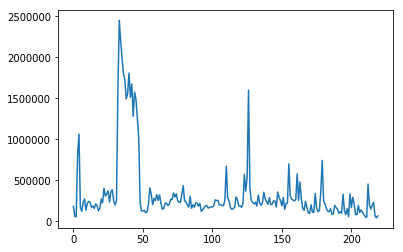

GNT
99284126.6375393
44105475.2657854
38971851.83730612
32831639.981904957
34412490.65944691
33000141.519017708
35633410.295486115
32784372.000923414
46371843.74420001
38403981.999862306
42560277.345425345
32296588.12457316
35057035.16376714
32449242.994085047
54073269.350238994
13144154.144982928
10924851.764343638
9372027.84566182
15135960.640706459
68292553.21313816
126204321.6697983
29072613.614579044
9702192.660858015
8133414.557068905
22917943.936653305
10813424.968980726
8912473.093973137
7485542.892221761
14944701.27378237
8481360.254277254
8060149.187446612
8490037.539554572
5629806.171785073
7751172.167582788
9883419.894519893
7772974.933145686
4817481.271660941
5510744.08553444
5815411.072283473
12760955.74645254
16878662.448521394
9335288.906333318
13993250.941574499
7394898.956898022
9502499.789292185
18207251.029567227
16315863.53390362
35941644.1752485
35362007.62564439
13521310.624080257
11428064.367318967
9191749.783582564
11986731.698157808
7975947.840156232
7348396.4

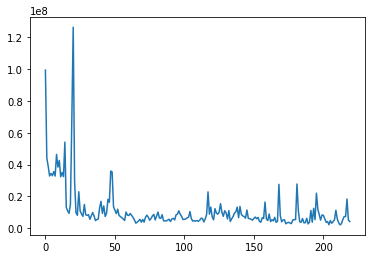

STRAT
2242514.31602018
1321543.4040462698
1305536.0294745802
1284086.40071336
1860457.24880033
1966763.9729792501
1590283.0271370201
1658112.69723695
1551048.29129631
1251641.2962203901
1450687.00971804
1959136.5301900997
1772910.68115997
1413790.6474324202
1528155.2640898498
1366096.2430359698
4721214.2736779805
2007929.44282375
2384640.5904781
2818903.9156917203
1713846.9029764005
2072349.44741307
2914748.7131936005
1373097.2578704504
1300154.94933248
1319961.90280054
1390739.85436502
1341134.01908938
1854370.34319826
1359480.4789213303
1105505.91698871
1087954.29660215
1047977.81551219
1557238.4734170304
1054668.61912521
871315.2787271602
809435.72233952
790659.7069047401
794760.6449933301
2028230.6443653
1477021.8959295698
3414687.6829281296
1106956.71221502
777222.5475847
836568.7434076901
1148502.04536676
997409.0387384001
1020925.81794629
786940.0977277502
828900.8928810201
884910.45484483
943721.3512220602
966106.9624228401
848264.8096431501
799713.38537406
762302.3765880099
10

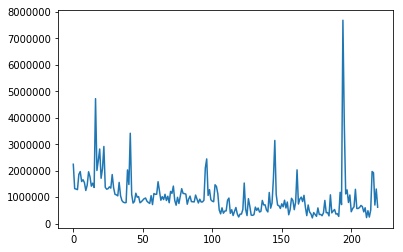

In [5]:
####TODO: CHECK VOLUMES TIMESERIES##########

for coin in coins:
    print(coin)
    coineth=[]
    coinsym=[x for x in symbols if (coin in x)]
    for t in range(100, 320):
        vol=0
        for x in coinsym:
            try:
                vol+=upload_ohlcv(time0+t*86400,x,1)['volume_traded']
            except:
                pass
        print(vol)
        coineth.append(vol)
    plt.plot(coineth)
    plt.show()

In [93]:
VOL={}
datapath='/home/databot/data/coinapi/'
for root, dirs, files in os.walk(datapath, topdown=False):
    for csvfil in files:
        csvfil=os.path.join(root, csvfil)
        if 'volume' in csvfil:
            with open(csvfil, 'r') as infile:
                sbam = csv.DictReader(infile)
                for row in sbam:
                    ttt=row['time_period_end']
                    if row['asset_id_base']=='SC' and row['asset_id_quote']=='BTC':
                        volt=float(row['volume_traded'])
                        VOL[ttt]=volt
                        

                    
                
            

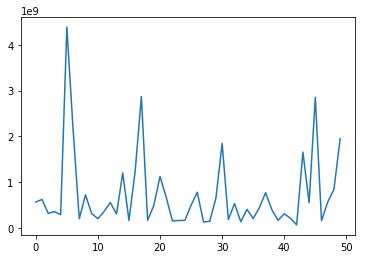

In [94]:
plt.plot(list(VOL.values())[:50])

In [86]:
A=np.array(list(VOL.values())[400:])
np.max(A)

7347633.218513242